{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Subset time series data using different options for time frames, including by year, month, and with a specified begin and end date. 

</div>


## Temporally Subset Data Using Pandas Dataframes

Sometimes a dataset contains a much larger timeframe than you need for your analysis or plot, and it can helpful to select, or subset, the data to the needed timeframe. 

There are many ways to subset the data temporally in **Python**; one easy way to do this is to use **pandas**.

**Pandas** natively understands time operations if:
1. you tell it what column contains your time stamps (using the parameter `parse_dates`) and 
2. you set the date column to be the index of the dataframe (using the parameter `index_col`).

On the previous page of this chapter, you already learned how to complete these steps during the `read_csv()` import into the **pandas** dataframe. On this page, you will learn how to use the `datetime` index to subset data from a **pandas dataframe**. 

### Import Packages and Get Data

You will use a slightly modified version of precipitation data (inches) downloaded from the <a href="https://www.ncdc.noaa.gov/cdo-web/search" target ="_blank">National Centers for Environmental Information (formerly National Climate Data Center) Cooperative Observer Network (COOP)</a> station 050843 in Boulder, CO. The data were collected from January 1, 2003 through December 31, 2013.

Your instructor has modified these data as follows:
* aggregated the data to represent daily sum values.
* added some no data values to allow you to practice handling missing data.
* added new columns to this data that would not usually be there if you downloaded it directly:
    * Year
    * Julian day (i.e. the calendar day number)

To begin, import the necessary packages to work with **pandas** dataframe and download data. 

You will continue to work with modules from **pandas** and **matplotlib** to plot dates more efficiently and with <a href="https://seaborn.pydata.org/introduction.html" target="_blank">**seaborn**</a> to make more attractive plots.  

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

### Download Curated Dataset From EarthPy

You will also download data from **earthpy** by specifiying a data key for the dataset called `colorado-flood`. <a href="https://earthpy.readthedocs.io/en/latest/earthpy-data-subsets.html#colorado-flood" target="_blank">This dataset</a> has been curated by the **earthpy** team to include the precipitation data collected for 2003-2013 for Boulder, CO.  

In [2]:
# Download the data
data = et.data.get_data('colorado-flood')

Note that when you download data using a data key in **earthpy**, the data are automatically downloaded to a new directory in the `data` directory under `earth-analytics`.  The name of the directory will be the same as the name of the dataset, for example, `colorado-flood`. 

For this dataset, there is a `precipitation` subdirectory within `colorado-flood` for the precipitation data.  

In [3]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file with daily precip total
file_path = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805325-precip-dailysum-2003-2013.csv")

Now that you have downloaded the dataset, you can import the file for the measurement station for Boulder, CO, and specify the:
1. no data values using the parameter `na_values`
2. date column using the parameter `parse_dates`
3. datetime index using the parameter `index_col`

In [4]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       parse_dates=['DATE'],
                                       index_col= ['DATE'],
                                       na_values=['999.99'])

# View first few rows
boulder_precip_2003_2013.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-01-05,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-02-02,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
2003-02-03,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34


In [5]:
# plt.rcParams['figure.figsize'] = (8, 8)
# plt.rcParams['axes.titlesize'] = 20
# plt.rcParams['axes.facecolor']='white'
# plt.rcParams['lines.color'] = 'purple'
# plt.rcParams['grid.linestyle'] = '-'
# plt.rcParams['grid.linewidth'] = '.5'
# plt.rcParams['lines.color'] = 'purple'

In [6]:
# This is the code that i used to process the data -- can we hide this chunk and potentially not run it but atleast hide it?
# precip_boulder = pd.read_csv('data/colorado-flood/precipitation/805325-precip-daily-2003-2013.csv',
#                              parse_dates=['DATE'])
# # aggregate the data by date
# precip_boulder_daily = precip_boulder.groupby('DATE').aggregate(
#     {'HPCP': 'sum', 'STATION': 'first', 'ELEVATION': 'first',
#      'STATION_NAME': 'first', 'LATITUDE': 'first', 'LONGITUDE': 'first'})
# # rename the HPCP column to a human readable column name
# precip_boulder_daily = precip_boulder_daily.rename(columns={'HPCP': 'DAILY_PRECIP'})
# # add the year column
# precip_boulder_daily['YEAR'] = precip_boulder_daily.index.year

### About the Precipitation Data

Viewing the structure of these data, you can see that different types of data are included in
this file.

* **STATION** and **STATION_NAME**: Identification of the COOP station.
* **ELEVATION, LATITUDE** and **LONGITUDE**: The spatial location of the station.
* **DAILY_PRECIP**: The total precipitation in inches. The metadata for this dataset notes that the value `999.99` indicates missing data. Also important, days with no precipitation are not included in the data.
* **YEAR**: the year the data were collected
* **JULIAN**: the JULIAN DAY the data were collected.

`DATE` is the date when the data were collected in the format: YYYY-MM-DD. 

Notice that `DATE` is now the index value because you used the `parse_date` and `index_col` parameters when you imported the CSV file into a **pandas** dataframe. 

Additional information about the data, known as metadata, is available in the
<a href="https://ndownloader.figshare.com/files/7283453">PRECIP_HLY_documentation.pdf</a>.

The metadata tell us that the no data value for these data is 999.99. IMPORTANT:
your instructor has modified these data a bit for ease of teaching and learning. Specifically,
data have been aggregated to represent daily sum values and some no data values have been added.

<i class="fa fa-star"></i> **Data Tip** You can download the original complete data subset with additional documentation
<a href="https://figshare.com/articles/NEON_Remote_Sensing_Boulder_Flood_2013_Teaching_Data_Subset_Lee_Hill_Road/3146284">here. </a>
{: .notice--success }

Even after reading documentation, it is always a good idea to explore data before working with them such as:
1. checking out the data types
2. calculating the summary statistics to get a sense of the data values (and make sure that "no data" values have been identified)
3. checking out the values in the `datetime` index. 

In [7]:
# View dataframe info
boulder_precip_2003_2013.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792 entries, 2003-01-01 to 2013-12-31
Data columns (total 8 columns):
DAILY_PRECIP    788 non-null float64
STATION         792 non-null object
STATION_NAME    792 non-null object
ELEVATION       792 non-null float64
LATITUDE        792 non-null float64
LONGITUDE       792 non-null float64
YEAR            792 non-null int64
JULIAN          792 non-null int64
dtypes: float64(4), int64(2), object(2)
memory usage: 55.7+ KB


In [8]:
# View summary statistics
boulder_precip_2003_2013.describe()

,DAILY_PRECIP,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
count,788.000000,792.0,792.000000,792.000000,792.000000,792.000000
mean,0.247843,1650.5,40.033850,-105.281106,2007.967172,175.541667
std,0.462558,0.0,0.000045,0.000005,3.149287,98.536373
min,0.000000,1650.5,40.033800,-105.281110,2003.000000,1.000000
25%,0.100000,1650.5,40.033800,-105.281110,2005.000000,96.000000
50%,0.100000,1650.5,40.033890,-105.281110,2008.000000,167.000000
75%,0.300000,1650.5,40.033890,-105.281100,2011.000000,255.250000
max,9.800000,1650.5,40.033890,-105.281100,2013.000000,365.000000


In [9]:
# View index values of dataframe
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01', '2003-01-05', '2003-02-01', '2003-02-02',
               '2003-02-03', '2003-02-05', '2003-02-06', '2003-02-07',
               '2003-02-10', '2003-02-18',
               ...
               '2013-11-01', '2013-11-09', '2013-11-21', '2013-11-27',
               '2013-12-01', '2013-12-04', '2013-12-22', '2013-12-23',
               '2013-12-29', '2013-12-31'],
              dtype='datetime64[ns]', name='DATE', length=792, freq=None)

## Subset Pandas Dataframe By Year

Because you have a dataframe set up with an index, you can start to easily subset your data using the syntax:

`df["index_date"]`

Note that the `datetime` index value is accessed using quotation marks `""` similar to how you query for text strings. 

Using this syntax, you can select all of the data for the year 2013 by specifying the value that you want to select from the `datetime` index:

In [10]:
# Select 2013 data - view first few records
boulder_precip_2003_2013['2013'].head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,1
2013-01-28,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,28
2013-01-29,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,29
2013-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,32
2013-02-14,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,45


In [11]:
# Select 2013 data - view last few records
boulder_precip_2003_2013['2013'].tail()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-12-04,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,338
2013-12-22,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,356
2013-12-23,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,357
2013-12-29,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,363
2013-12-31,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,365


Note that in the previous example, you are querying the `datetime` index directly, not querying the values from the `Year` column.


## Subset Pandas Dataframe By Month

Using a `datetime` index with **pandas** makes it really easy to continue to select data using additional attributes of the index such as `month`.

This attribute of the `datetime` index can be accessed as:

`df.index.month == value`

where the month values are numeric values ranging from 1 to 12, representing January through December.

With this attribute, you can now employ the **pandas** syntax to <a href="{{ site.url }}/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/#filter-data-using-specific-values">filter values in a pandas dataframe</a> using the syntax:

`df[df.index.month == value]`

In [12]:
# Select all December data - view first few rows
boulder_precip_2003_2013[boulder_precip_2003_2013.index.month == 12].head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,335
2004-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,336
2004-12-22,0.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,357
2004-12-24,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,359
2005-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,335


In [13]:
# Select all December data - view last few rows
boulder_precip_2003_2013[boulder_precip_2003_2013.index.month == 12].tail()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-12-04,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,338
2013-12-22,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,356
2013-12-23,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,357
2013-12-29,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,363
2013-12-31,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,365


Notice that `head()` displays December records in 2003, while `tail()` displays December records in 2013. 

## Subset Pandas Dataframe By Day of Month

Similarly, you can the attribute `day` of the index to select all records for a specific day of the month as follows: 

`df.index.month == value`

where the month values are numeric values ranging from 1 to 31, representing possible days of the month.

In [14]:
# Select data for 1st of month - view first rows
boulder_precip_2003_2013[boulder_precip_2003_2013.index.day == 1]

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-03-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,60
2003-04-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,91
2003-05-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,121
...,...,...,...,...,...,...,...,...
2013-08-01,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,2013,213
2013-09-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,2013,244
2013-10-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,2013,274


## Subset Pandas Dataframe Using Range of Dates

You can also subset the data using a specific date range using the syntax:

`df["begin_index_date" : "end_index_date]`

For example, you can subset the data to a desired time period such as May 1, 2005 - August 31 2005, and then save it to a new dataframe. 

In [15]:
# Subset data to May-Aug 2005
precip_may_aug_2005 = boulder_precip_2003_2013['2005-05-01':'2005-08-31']

precip_may_aug_2005.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2005-05-01,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,121
2005-05-11,1.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,131
2005-05-30,0.5,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,150
2005-05-31,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,151
2005-06-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,152


### Check Minimum and Maximum Values of Index

Rather than just checking the results of `head()` and `tail()`, you can actually query the `min` and `max` values of the index as follows:

In [16]:
# Check min value of index 
print(precip_may_aug_2005.index.min())

# Check max value of index 
print(precip_may_aug_2005.index.max())

2005-05-01 00:00:00
2005-08-23 00:00:00


## Plot Temporal Subsets From Pandas Dataframe

Once you have subsetted the data and saved it, you can plot the data from the new dataframe to focus in on the desired time period. 

Once again, you will use `.index.values` to access the `datetime` index values for the plot. 

In [17]:
# format x axis to customize date ticks and labels - removing this...
# from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
# months = MonthLocator()  # every month
# yearsFmt = DateFormatter('%b %d')
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ax.autoscale_view()

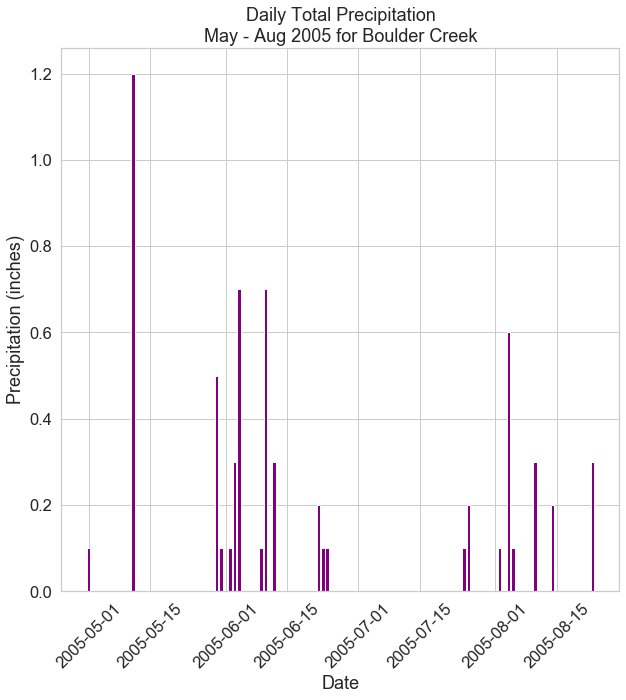

In [18]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(precip_may_aug_2005.index.values,
       precip_may_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nMay - Aug 2005 for Boulder Creek")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

### Think of New Applications and Uses of Subsetting

Given what you have learned about using `df.index.month` and `df.index.day` to select data by the month or day of the month value:
* What would you replace `month` or `day` with, in order to select data by year or even a specific week of the year?